In [23]:
import numpy as np


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文 (for Win10)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊

df = pd.read_csv('A_LVR_LAND_A.csv', encoding='big5') #台北市

In [25]:
# 去除土地和車位兩種交易資料
df = df[(df['交易標的']!='土地') & (df['交易標的']!='車位')].reset_index(drop=True)
#改成以萬為單位，方便圖表顯示
df.loc[:,'總價元'] = df.loc[:,'總價元']/10000 
for i in range(len(df)):
    df.loc[i,'交易年'] = round(df.loc[i,'交易年月日']/10000)
from datetime import datetime
now = datetime.now()
now.year #(年,月,日,時,分,秒,微秒) ps: 微秒(microseconds)=1/1000000秒
for i in range(len(df)):
    df.loc[i,'建築完成年'] = round(df.loc[i,'建築完成年月']/10000)
    df.loc[i,'屋齡'] = now.year - 1911 - round(df.loc[i,'建築完成年月']/10000)
#df.sample(5)

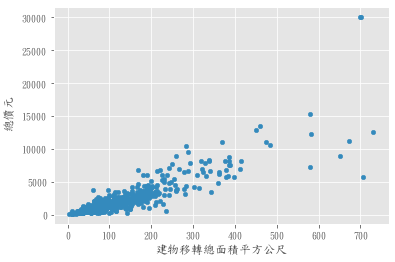

In [26]:
df = df[['鄉鎮市區','土地移轉總面積平方公尺','建物移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年','總價元']]
df_ml = df.dropna().reset_index(drop=True)

df_ml = df_ml[df_ml['建物移轉總面積平方公尺']<1000]
df_ml.plot(kind='scatter',x='建物移轉總面積平方公尺',y='總價元')

In [27]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
539,29.48
241,150.67
454,38.65
45,132.11
626,287.77


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Compute the mean and std to be used for later scaling.
sc.fit(X_train)
#Perform standardization by centering and scaling
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)



In [29]:
def computeCost(X, y, weight=np.array([[0,0]])):
    m = y.size
    J = 0
    h = X.dot(weight)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

#weight : w0,w1
# 初始weight [0,0]
def gradientDescent(X, y, weight=np.array([[0,0]]), alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iters in np.arange(num_iters):
        h = X.dot(weight)
        weight = weight - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iters] = computeCost(X, y, weight)
    return(weight, J_history)

In [35]:
print(type(X_train_normalized))
print(X_train_normalized[:5])
print(type(y_train.values))
print(y_train.values[:5])

<class 'numpy.ndarray'>
[[-0.95334348]
 [ 0.18868842]
 [-0.86693015]
 [ 0.01378857]
 [ 1.48064794]]
<class 'numpy.ndarray'>
[[ 360.]
 [1720.]
 [ 380.]
 [1620.]
 [9600.]]


weight:  [2504.11238731 2504.11238731]


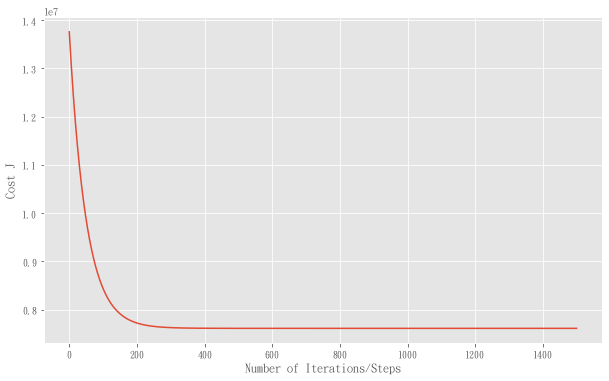

In [32]:
# theta for minimized cost J
weight , Cost_J = gradientDescent(X_train_normalized, y_train.values)

print('weight: ',weight.ravel())
plt.figure(figsize=(10,6))
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations/Steps');